# AOS AuxTel test data 

Setup:

    ssh -L 54467:localhost:54467 scichris@lsst-devl02
    source "/software/lsstsw/stack/loadLSST.bash"
    setup lsst_distrib
    source /project/scichris/aos/setup_aos_current.sh
    jupyter notebook --no-browser --port=54467

Use data from https://github.com/lsst-ts/ts_externalscripts/blob/develop/tests/auxtel/test_latiss_cwfs_align.py#L222
https://github.com/lsst-ts/ts_externalscripts/blob/develop/tests/auxtel/test_latiss_cwfs_align.py#L412 , used in unit tests: 
    
    2021032300308
    2021032300310
    


In [1]:
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/repo/main/')

registry = butler.registry
datasetRefs = list(registry.queryDatasets(instrument='LATISS', datasetType='raw', collections=['LATISS/raw/all'],
                                          where="exposure.day_obs=20210323"
                                         ))
datasetRefs[0]

DatasetRef(DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure), {instrument: 'LATISS', detector: 0, exposure: 2021032300001, ...}, id=c17708d6-c627-5431-a836-28cd2cfff8ef, run='LATISS/raw/all')

Check FOCUSZ in this series of exposures:

In [2]:

for exp in range(307,313):
    exposure = butler.get('raw', dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':int(f'2021032300{exp}')
                                        },
                      collections=['LATISS/raw/all'])
    print(exp, exposure.getMetadata()['FOCUSZ'])

/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000307-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


307 -0.847813427448273


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000308-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


308 0.752186596393585


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000309-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


309 -0.839468240737915


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000310-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


310 0.760531783103943


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000311-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


311 -0.0349768586456776


/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000312-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


312 -0.0349768586456776


In [3]:
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/repo/main/', instrument='LATISS')



exposure_intra = butler.get('raw', dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':2021032300307},
                      collections=['LATISS/raw/all'])
print(exposure_intra.getMetadata()['FOCUSZ'])


exposure_extra = butler.get('raw', dataId={'instrument':'LATISS', 'detector':0, 
                                     'exposure':2021032300308},
                      collections=['LATISS/raw/all'])

print(exposure_extra.getMetadata()['FOCUSZ'])



/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000307-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))
/lsstdata/offline/instrument/LATISS/storage/2021-03-23/AT_O_20210323_000308-R00S00.fits: outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))


-0.847813427448273
0.752186596393585


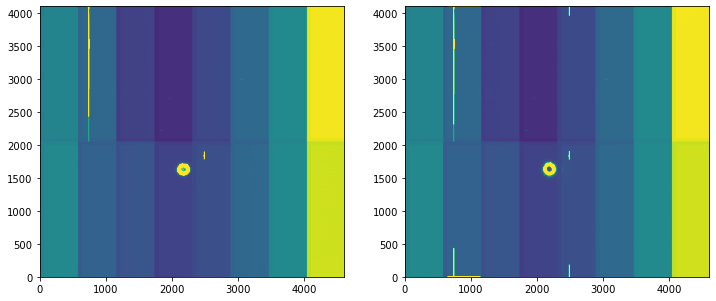

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax  = plt.subplots(1,2,figsize=(12, 10))
ax[0].imshow(exposure_extra.image.array, origin='lower',vmax=20000)# vmax=50)
mappable = ax[1].imshow(exposure_intra.image.array, origin='lower',vmax=20000)
#plt.colorbar(mappable,ax=ax[1])

Run the ISR: 

    ssh lsst-devl02

    source "/software/lsstsw/stack/loadLSST.bash"
    setup lsst_distrib

    pipetask run  --data-query "exposure IN (2021032300307,2021032300308,2021032300309,2021032300310,2021032300311) AND instrument='LATISS' " -b /repo/main/butler.yaml --input  LATISS/raw/all,LATISS/calib,u/czw/DM-28920/calib.20210720  --output u/scichris/Latiss/postISRtest --pipeline /project/scichris/aos/testLatiss4.yaml  --register-dataset-types
    
    
  

Show the postISR : 

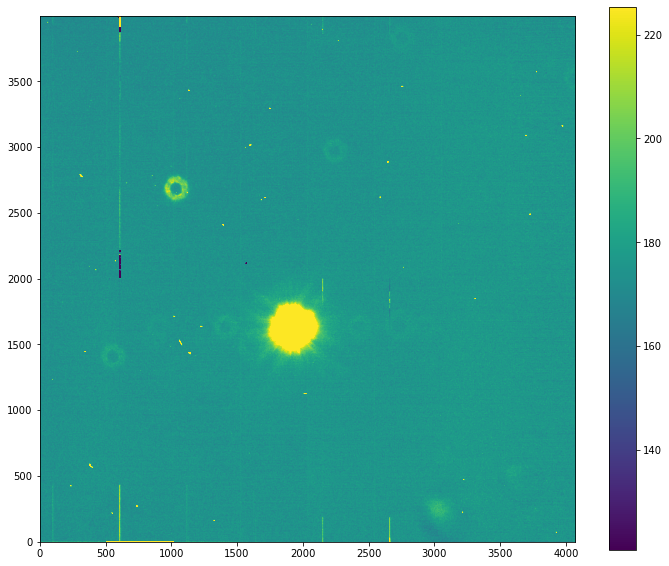

In [5]:
%matplotlib inline
from astropy.io import fits
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()


hdula = fits.open('/repo/main/u/scichris/Latiss/postISRtest/20210930T214817Z/\
postISRCCD/20210323/AT_O_20210323_000307/\
postISRCCD_LATISS_RG610~empty_AT_O_20210323_000307_RXX_S00_u_scichris_Latiss_postISRtest_20210930T214817Z.fits')
fig = plt.figure(figsize=(12, 10))

data = hdula[1].data
vmin, vmax = zscale.get_limits(data)
plt.imshow(data, origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()

In [6]:
plt.hist(np.ravel(data), range=(0,300))

NameError: name 'np' is not defined

## Run Zernike estimation

First, declare the postISR exposure pair

In [1]:
from lsst.daf import butler as dafButler
instrument = 'LATISS'
dataId0 = dict(instrument=instrument)
repo_dir = '/repo/main/'
butler = dafButler.Butler(repo_dir, collections=['run1'])
                          
dataset = next(iter(
                butler.registry.queryDatasets(
                    datasetType='postISRCCD', 
                    collections=['u/scichris/Latiss/postISRtest'],
                    dataId=dataId0  )
                )
           )

expN = dataset.dataId["exposure"]

# Get the refs  for this dataset
refs = []
for ref in butler.registry.queryDatasets(
                    datasetType='postISRCCD', 
                    collections=['u/scichris/Latiss/postISRtest'],
                    dataId=dataId0  ):
    refs.append(ref)

In [2]:
refs[0].dataId

{instrument: 'LATISS', detector: 0, exposure: 2021032300307, ...}

In [3]:
refs[1].dataId

{instrument: 'LATISS', detector: 0, exposure: 2021032300308, ...}

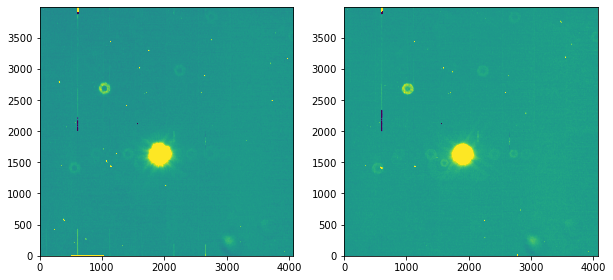

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()


exp1 = butler.get(datasetRefOrType='postISRCCD',dataId=refs[0].dataId,
              collections=['u/scichris/Latiss/postISRtest'])

exp2 = butler.get(datasetRefOrType='postISRCCD',dataId=refs[1].dataId,
              collections=['u/scichris/Latiss/postISRtest'])

fig,ax = plt.subplots(1,2,figsize=(10,5))
data  = exp1.image.array
vmin, vmax = zscale.get_limits(data)
ax[0].imshow(data, origin='lower', vmin=vmin,vmax=vmax)

data  = exp2.image.array
vmin, vmax = zscale.get_limits(data)
ax[1].imshow(data, origin='lower', vmin=vmin,vmax=vmax)

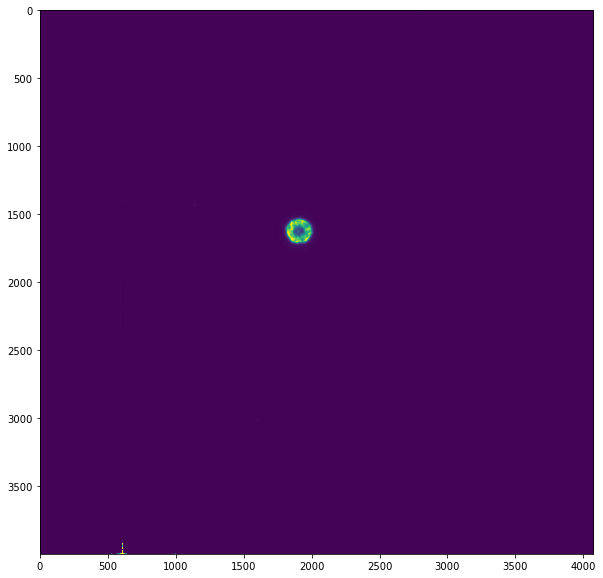

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(data,vmin=0,vmax=20000)

In [7]:
expPair = [exp1,exp2]

## Fit the donut template (to one of the exposures)

In [8]:
from lsst.ts.wep.task.EstimateZernikesLatissTask import EstimateZernikesLatissTask, EstimateZernikesLatissTaskConfig
estimateZernikeConfig = EstimateZernikesLatissTaskConfig(donutStampSize=200,donutTemplateSize=200)
estimateZernikeTask = EstimateZernikesLatissTask(config=estimateZernikeConfig)
estimateZernikeTask.instName = 'auxTel'
estimateZernikeTask.opticalModel = 'onAxis'

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from lsst.ts.wep.Utility import DefocalType

# get the defocal exposure...
from lsst.daf import butler as dafButler
butler = dafButler.Butler('/repo/main/', collections=['u/scichris/Latiss/postISRtest'])
exposure  = butler.get(datasetRefOrType='postISRCCD',
                       dataId={'detector':"RXX_S00",'exposure':2021032300308})


# make template 
detectorName = exposure.getDetector().getName()
pixelScale = exposure.getWcs().getPixelScale().asArcseconds()
defocalType = DefocalType.Extra
template = estimateZernikeTask.getTemplate(detectorName, defocalType, pixelScale)

In DonutTemplateModel using opticalModel onAxis
and maskScalingFactorLocal=2.0
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=2.0

 rMask:
0.0026388888888888885


Text(0.5, 1.0, 'auxTel, onAxis, mSf=0.5')

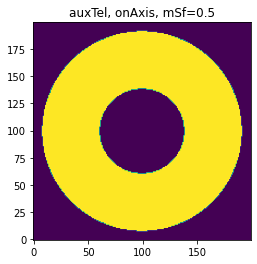

In [12]:
plt.imshow(template,origin='lower')
plt.title(f'auxTel, {estimateZernikeTask.opticalModel}, mSf=0.5')
#plt.savefig(f'auxTel_{estimateZernikeTask.opticalModel}_maskScalingFactorLocal-05.png')

Detect the donuts:

In [ ]:
plt.hist(np.ravel(exp), range=(100,300))

In [ ]:
exp = exposure.getImage().getArray()


In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(exp, vmin=20, vmax=550)

In [ ]:
plt.plot(exp[1050,:])

https://github.com/lsst-ts/ts_wep/blob/master/python/lsst/ts/wep/deblend/DeblendAdapt.py#L170

Plot the binary image to ensure that the thresholds are chosen correctly:

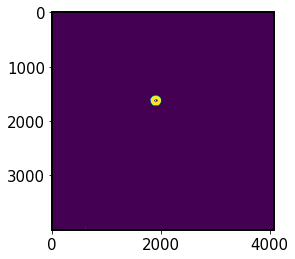

In [80]:
from lsst.ts.wep.Utility import CentroidFindType
from lsst.ts.wep.cwfs.CentroidFindFactory import CentroidFindFactory
from copy import copy



centroidFinder = CentroidFindFactory.createCentroidFind(
    CentroidFindType.ConvolveTemplate
)

expArray = copy(exposure.getImage().getArray())

# this is to make sure that oversaturated pixels do not 
# confuse the image range 

# thresh = 170
# expArray[expArray < thresh] = 0
# expArray[expArray >= thresh] = 1
#https://github.com/lsst-ts/ts_wep/blob/master/python/lsst/ts/wep/deblend/DeblendAdapt.py#L170
    
#thresh = 180
#highThresh = 400
thresh=5000
highThresh=20000
expArray[expArray < thresh] = 0
expArray[expArray >= thresh] = 1
expArray[expArray > highThresh] = 0

binaryExp = centroidFinder.getImgBinary(copy(expArray))
plt.imshow(binaryExp)

Run donut detection via template fitting:

In [110]:
from lsst.ts.wep.DonutDetector import DonutDetector
detector = DonutDetector()

from copy import copy
expArray = copy(exposure.getImage().getArray())

# this is to make sure that oversaturated pixels do not 
# confuse the image range 
# thresh = 180
# expArray[expArray < thresh] = 0
# expArray[expArray >= thresh] = 1

# use that to detect both the bright and faint donut 
thresh = 180
highThresh = 400

# use that to only do the bright donut 
# thresh=5000
# highThresh=20000


expArray[expArray < thresh] = 0
expArray[expArray >= thresh] = 1
expArray[expArray > highThresh] = 0
donutDf = detector.detectDonuts(expArray, template, blendRadius=100,
                               peakThreshold=0.55)

In [111]:
donutDf

,x_center,y_center,blended,blended_with,num_blended_neighbors
0,1673,1865,False,None,0
1,2674,1022,False,None,0


Make a donut catalog, which needs a coordinate column, and different names for columns

In [112]:
# need  to rename columns 
# as we EstimateZernikes 
# expects different names 
#Unnamed: 0	coord_ra	coord_dec	centroid_x	centroid_y	source_flux	detector	mags
donutCat = donutDf.copy()

# also, need to transpose y--> x 
donutCat = donutCat.rename(columns={"y_center":"centroid_x", "x_center":"centroid_y"})

donutCat['detector'] = "RXX_S00"



Plot the detected donuts on top of the exposure

In [ ]:
for data in exposure.getMetadata():
    print(data)

In [88]:
expArray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

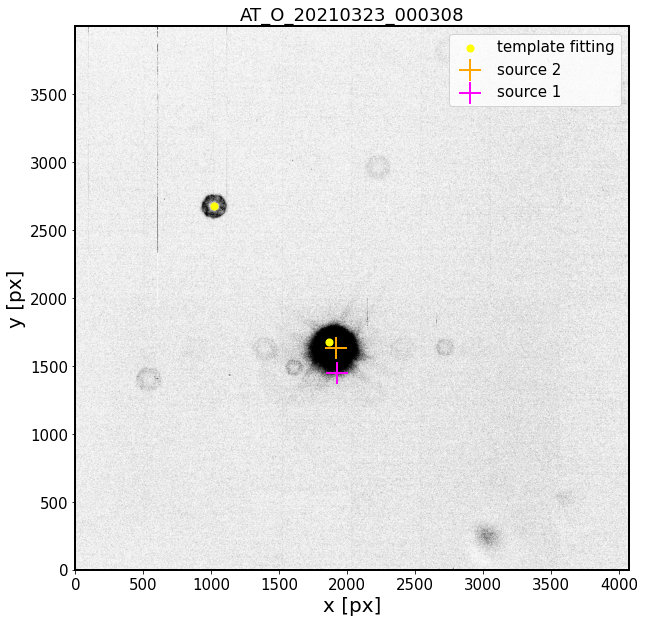

In [113]:
from astropy.visualization import ZScaleInterval
from lsst.daf import butler as dafButler
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from astropy.io import fits
from astropy.visualization import ZScaleInterval

import numpy as np 
import os 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

data = expArray
zscale = ZScaleInterval()
vmin, vmax = zscale.get_limits(data)

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(data, vmin=vmin, vmax=vmax,cmap='Greys', origin='lower')
ax.scatter(donutDf['y_center'], donutDf['x_center'], s=50, c='yellow', label='template fitting')



size = 500
linewidths=2
source2 = [1915.2870675674224, 1629.638405]
#[1915.2870675674224, 1629.638405] 
# [1915.2870675674224, 1629.638405]
ax.scatter(source2[0], source2[1], marker='+', s=size,c = 'orange', lw=linewidths, label='source 2')
source1 = [1926.0, 1450.0]
#source1 = [1908.3507014028055, 1454.0437162985766]
# [1908.3507014028055, 1454.0437162985766]
ax.scatter(source1[0], source1[1], marker='+', s=size,c = 'magenta', lw=linewidths, label="source 1")
#ax.imshow(template,alpha=0.1)
ax.set_title(exposure.getMetadata()["OBSID"])
ax.set_xlabel('x [px]')
ax.set_ylabel('y [px]')
plt.legend()

**308-311**

In [87]:
FOV is 6.7 arcmin https://noirlab.edu/science/programs/vera-c-rubin-observatory/rubin-auxiliary-telescope 

0.0

In [ ]:
data[]

Try to get any ra,dec in radians, even based on an incorrect WCS, to pass to `cutoutStamps`:

In [114]:
wcs = exposure.getWcs()

import numpy as np 
x = np.array(donutCat['centroid_x'].values)
y = np.array(donutCat['centroid_y'].values)

x = np.zeros(0)
for row in donutCat['centroid_x'] : 
    x = np.append(x, row)
    
ra,dec = wcs.pixelToSkyArray(x,y,degrees=False)  

donutCat['coord_ra'] = ra
donutCat['coord_dec'] = dec

In [115]:
donutCat

,centroid_y,centroid_x,blended,blended_with,num_blended_neighbors,detector,coord_ra,coord_dec
0,1673,1865,False,None,0,RXX_S00,1.019465,-0.483072
1,2674,1022,False,None,0,RXX_S00,1.019024,-0.482607


Run the Zernike estimation given the exposure pair and the donut catalog

Text(0.5, 1.0, 'donut 1')

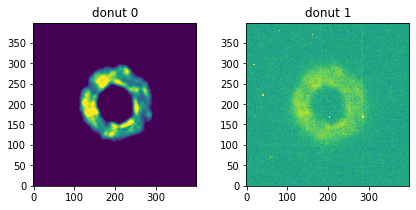

In [10]:
fig,ax = plt.subplots(1,2,figsize=(7,3))
cutout = 200
# donut #0:  
# initial values 1865 1673
# final values  1915 1632
y,x = 1915,1632 
data = exp1.getImage().getArray()
stamp = data[x-200:x+200,y-200:y+200]
vmin, vmax = zscale.get_limits(stamp)
ax[0].imshow(stamp,vmin=8000,vmax =20000, origin='lower')
ax[0].set_title('donut 0')
# donut #1 : 
# 
# final values 1033  2684 
y,x = 1033,2684
data = exp1.getImage().getArray()
stamp = data[x-200:x+200,y-200:y+200]
vmin, vmax = zscale.get_limits(stamp)
ax[1].imshow(stamp,vmin=vmin,vmax =vmax, origin='lower')
ax[1].set_title('donut 1')


(array([7.721e+03, 2.870e+02, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 1.000e+00]),
 array([200., 230., 260., 290., 320., 350., 380., 410., 440., 470., 500.],
       dtype=float32),
 <BarContainer object of 10 artists>)

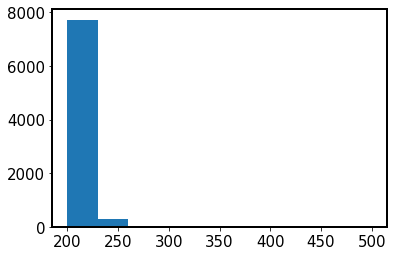

In [124]:
plt.hist(np.ravel(stamp), range=(200,500))

In [128]:
# This should return the extra-focal DonutStamps, intra-focal DonutStamps and
# Zernike coefficient numpy array as Struct that can be saved to
# Gen 3 repository all with the same dataId.
zernikeOutput = estimateZernikeTask.run(expPair, donutCat, "LATISS")

In DonutTemplateModel using opticalModel onAxis
and maskScalingFactorLocal=2.0
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=2.0

 rMask:
0.0026388888888888885
1865 1673
--> 1915 1632
1022 2674
--> 1033 2684
In DonutTemplateModel using opticalModel onAxis
and maskScalingFactorLocal=2.0
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=2.0

 rMask:
0.0026388888888888885
1865 1673
--> 1903 1625
1022 2674
--> 1021 2673
0 / 2
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=1

 rMask:
0.0013194444444444443
apertureDiameter=1.2, focalLength=21.6
offset=0.0475
maskScalingFactorLocal=1

 rMask:
0.0013194444444444443
imageCoCenter: (x, y) = (   99.81,   98.01)

imageCoCenter: (x, y) = (  103.11,   95.04)

itr = 0, z4-z22
[ -25.   -9.   70. -141.   28.   -6.   11.   -9.   -1.    2.   27.   -5.
   -6.   22.    1.    2.    6.   12.    9.]
itr = 1, z4-z22
[ -38.   -5.   78. -146.   33.   -6.    9.   -8.   -2.    1. 

Explore the results

In [129]:
zerCoeff = zernikeOutput.outputZernikesAvg

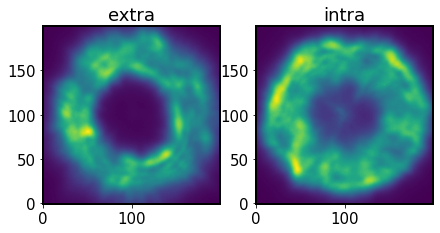

In [132]:
fig,ax = plt.subplots(1,2,figsize=(7,4))

i=0
donut = zernikeOutput.donutStampsExtra[i]
ax[0].set_title('extra')
ax[0].imshow(donut.stamp_im.getArrays()[0], origin='lower',)# vmin=100, vmax=250)

donut = zernikeOutput.donutStampsIntra[i]
ax[1].set_title('intra')
ax[1].imshow(donut.stamp_im.getArrays()[0], origin='lower',)# vmin=100,vmax=250)

(array([8807., 4586., 3944., 2961., 4840., 6738., 5338., 1860.,  717.,
         209.]),
 array([  197.9233,  2682.9668,  5168.0107,  7653.054 , 10138.098 ,
        12623.142 , 15108.185 , 17593.229 , 20078.271 , 22563.316 ,
        25048.36  ], dtype=float32),
 <BarContainer object of 10 artists>)

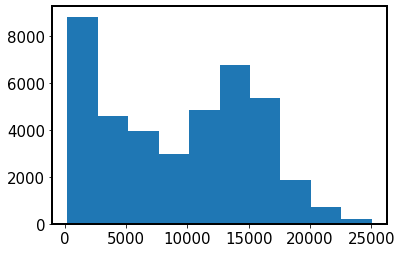

In [133]:
plt.hist(np.ravel(donut.stamp_im.getArrays()[0]),)#range=(0,400))

Truth:  three Zernikes in nm  `[coma-X, coma-Y, focus]`, i.e. `[zer7,8,4]`  : `[-19.40256, -51.19022, -11.11000]`,  according to ![according to ](https://www.telescope-optics.net/images/zernike_pyramide.PNG)

In [134]:
len(zernikeOutput.outputZernikesRaw)

2

In [135]:
zernikeOutput.outputZernikesRaw[0]

array([-0.01776798, -0.00774727,  0.16230097, -0.07960705,  0.02771488,
       -0.00620039,  0.02582157, -0.01332525,  0.00047742,  0.00249828,
        0.05375088, -0.01511297, -0.0060236 ,  0.00195664,  0.00100984,
        0.00183087,  0.01748512,  0.02340681,  0.01091786])

In [136]:
donut = zernikeOutput.donutStampsExtra[0]

In [137]:
donut.centroid_position.getX()

1915.0

In [138]:
zerDicNm = {}
num = 4
for zer in zernikeOutput.outputZernikesRaw[0]:
    zerDicNm[num] = zer*1000 # convert microns to nanometers
    num += 1     

In [139]:
zerDicNm

{4: -17.767980976437947,
 5: -7.747269366554557,
 6: 162.30096700245215,
 7: -79.60704775533098,
 8: 27.71487987812517,
 9: -6.200390453549377,
 10: 25.821566906993127,
 11: -13.325246594704069,
 12: 0.47741794626856304,
 13: 2.498276571874049,
 14: 53.75088271549859,
 15: -15.11297147773089,
 16: -6.0236033908461275,
 17: 1.9566377762110756,
 18: 1.0098404339726348,
 19: 1.8308706856699912,
 20: 17.485121627105727,
 21: 23.406809568978442,
 22: 10.91786436100134}

In [140]:
zerDicNm[4]

-17.767980976437947

In [141]:
zerDicNm[7]

-79.60704775533098

In [142]:
zerDicNm[8]

27.71487987812517

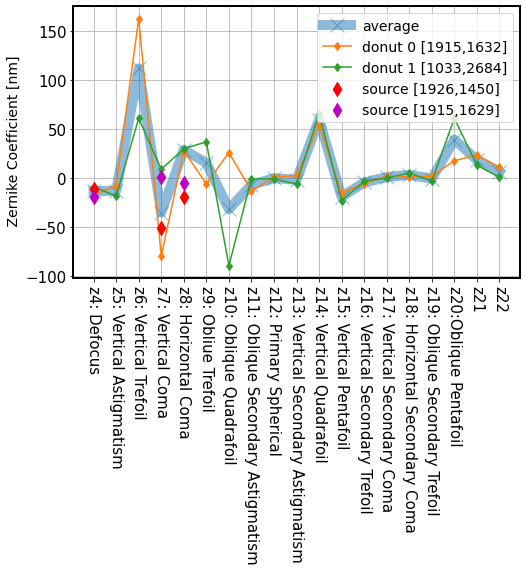

In [161]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(8, 5))
# I'm not sure about the OPD values to compare to... 
#plt.plot(np.arange(4, 23), opdVals[85], '-o', lw=3, markersize=10, label='OPD')

donutLoc = {0:'1915,1632',
           1:'1033,2684'}
plt.plot(np.arange(4, 23),  1000*zernikeOutput.outputZernikesAvg, '-x', lw=10,alpha=0.5, markersize=14, label='average')
for i in range(len(zernikeOutput.outputZernikesRaw)):#[0,1,2,3,4,5,6,7]:
    plt.plot(np.arange(4, 23),1000*zernikeOutput.outputZernikesRaw[i], '-d', label=f'donut {i} [{donutLoc[i]}]')
    #plt.xlabel('Zernike Number', size=14)

plt.ylabel(' Zernike Coefficient [nm]', size=14)
[-5.156342491620025, 0.6554215087770965, -19.8341551660864]
[-19.40256, -51.19022, -11.11000]
plt.scatter([8,7,4], [-19.40256, -51.19022, -11.11000], c='r', marker='d',s=100,zorder=10,
            label='source [1926,1450]')
plt.scatter([8,7,4], [-5.156342491620025, 0.6554215087770965, -19.8341551660864],
            
            c='m', marker='d',s=100,zorder=10,
           label='source [1915,1629]')
plt.legend(fontsize=14, loc='upper right')
plt.xticks(np.arange(4,23),['z4: Defocus', 'z5: Vertical Astigmatism', 
                            'z6: Vertical Trefoil', 'z7: Vertical Coma',
                           'z8: Horizontal Coma', 'z9: Obliue Trefoil',
                           'z10: Oblique Quadrafoil', 'z11: Oblique Secondary Astigmatism',
                           'z12: Primary Spherical', 'z13: Vertical Secondary Astigmatism',
                           'z14: Vertical Quadrafoil', 
                           'z15: Vertical Pentafoil', 'z16: Vertical Secondary Trefoil', 
                           'z17: Vertical Secondary Coma',
                           'z18: Horizontal Secondary Coma', 
                           'z19: Oblique Secondary Trefoil', 
                           'z20:Oblique Pentafoil', 
                           'z21','z22'],
           rotation=270
          )

danish_4_11_intra_nm = [-3104.618,
                        17.177,
                        134.087,
                        -26.133,
                        88.511,
                        -20.925,
                         14.620 ,
                        41.928]
danish_4_11_extra_nm   = [2951.144,
                         24.803,
                         161.688 ,
                          -2.071,
                          64.181,
                           21.840,
                          21.485,
                          -38.272]

plt.scatter(np.arange(4,11), danish_4_11_intra_mm)

plt.grid()

In [48]:
plt.xticks?

Plot the donut stamps 

In [ ]:
fig,ax = plt.subplots(8,2,figsize=(8,4*8))

for i in range(len(zernikeOutput.donutStampsExtra)):
    donut = zernikeOutput.donutStampsExtra[i]
    ax[i,0].imshow(donut.stamp_im.getArrays()[0], origin='lower')
    
    donut = zernikeOutput.donutStampsIntra[i]
    ax[i,1].imshow(donut.stamp_im.getArrays()[0], origin='lower')
ax[0,0].set_title('Extra')
ax[0,1].set_title('Intra')